## Day 77 Lecture 1 Assignment

In this assignment, we will learn about convolutions using Dask arrays.

In [1]:
import dask.array as da

In [2]:
import os
import random

import cv2
import numpy as np
import pandas as pd

In [7]:
image = cv2.imread('6-facial-recognition-hero.jpg', cv2.IMREAD_GRAYSCALE)

In [8]:
image.shape

(1360, 2040)

In [30]:
image_da = da.asarray(image)
image_da

dask.array<array, shape=(1360, 2040), dtype=uint8, chunksize=(1360, 2040), chunktype=numpy.ndarray>

Rechunk the image array into chunks of 100x100.

In [31]:
# Answer below

image_da = image_da.rechunk((100,100))

image_da

dask.array<rechunk-merge, shape=(1360, 2040), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

In the code above, we read an image of a face and converted it into a Dask array. We will use this array to learn about convolutions. You can learn more about convolutions <a href="http://setosa.io/ev/image-kernels/">here</a>.

Convolutions are transformations of matrices that help us create convolutional neural network (which are crucial in deep learning) or apply effects to images like blurring or sharpening.

Our kernel is a 3x3 matrix which we apply to every 3x3 subset of our image matrix.

To start with our transformation, zero pad the image matrix with a width of one. This means that our output will be a matrix with an additional row and additional column of zeros on both sides. The image below illustrates padding. Use the pad function 
<img src="https://www.researchgate.net/profile/Terje_Midtbo/publication/318967374/figure/fig4/AS:669210783002634@1536563692382/Visualization-of-a-matrix-that-is-zero-padded-with-one-border.png">

In [32]:
# Answer below:

image_da = da.pad(image_da, 1, 'constant', constant_values=0)
image_da

dask.array<concatenate, shape=(1362, 2042), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

What is the shape of our padded array?

In [33]:
# Answer below:

image_da.shape



(1362, 2042)

To apply a convolution, we will install the `dask-image` package. Do this below.

In [35]:
# Answer below:

!pip install dask-image


     |████████████████████████████████| 68 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 3.0 MB/s eta 0:00:011
  Created wheel for dask-image: filename=dask_image-0.4.0-py2.py3-none-any.whl size=31513 sha256=46928721ddc45f4de6eafbaa20d45d74dc9ce6fcea982f9deb23205f0ae69aaa
  Stored in directory: /Users/abilenky/Library/Caches/pip/wheels/fe/e1/cc/69f1c78754ad3a9a63aa26bb797de9b266deb87a515cfaa633
  Created wheel for pims: filename=PIMS-0.5-py3-none-any.whl size=84326 sha256=4946fa365b05d6cb605be58044b8257b661860bdb36cf372d7943dfe25791449
  Stored in directory: /Users/abilenky/Library/Caches/pip/wheels/6c/69/f3/41140113aa50444a23e783a4288d4662797ebc4fa55edd6370
Successfully built dask-image pims


Import the convolve function from the package

In [36]:
# Answer below:
from dask_image.ndfilters import convolve


Define the sharpen convolution from the setosa.io article mentioned above. Apply the convolution to our padded image.

In [39]:
# Answer below:

k = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
k

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

In [42]:
conv_img = convolve(image_da, k)
conv_img

dask.array<_trim, shape=(1362, 2042), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

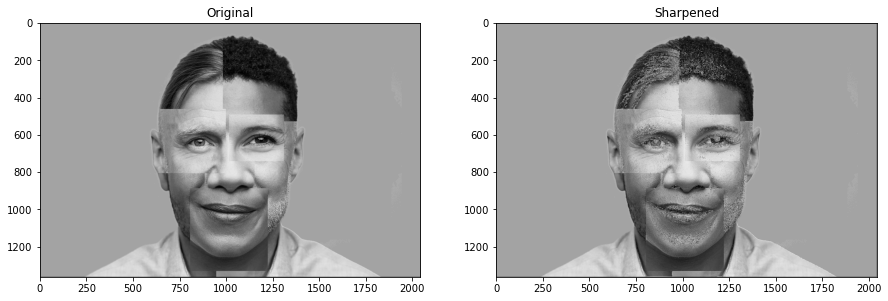

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,20))
plt.subplot(1,2,1)
plt.imshow(image_da.compute(), cmap='gray')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(conv_img.compute(), cmap='gray')
plt.title('Sharpened')
plt.show()